# Regressão!
## Alan Silva Furquim - 200049 / Vitor Augusto de LIma Soares 200327

Esse notebook contém todas as funções necessária para realizar a **regressão** no em um dataframe com dados do **Walmart**, apresentando as seguintes informações:
-   **Num_Loja** - O número único de cada loja
-   **Data** - A semana das vendas
-   **Vendas_Semanais** - O total de vendas na semana da respectiva loja
-   **Flag_Feriado** - Mostra se a respectiva semana tem feriados ou não. 1- Tem feriados na semana, 2- Não tem feriados na semana
-   **Temperatura** - A temperatura no dia da venda
-   **Preco_Combustivel** - O valor do combustivel da região da loja
-   **CPI** – Índice de preço ao consumidor
-   **Desemprego** - Taxa de desemprego
-  **Lista de feriados**:
	-  **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
	-	**Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
	-	 **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
	-	**Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


In [2]:
import pandas as pd

In [3]:
df_walmart = pd.read_csv(r'regressao_walmart.csv')

In [4]:
df_walmart.rename(columns={'Store':'Num_Loja', 'Date':'Data', 'Weekly_Sales':'Vendas_Semanais', 'Holiday_Flag':'Flag_Feriado', 'Temperature':'Temperatura', 'Fuel_Price':'Preco_Combustivel', 'Unemployment':'Desemprego'}, inplace=True)

In [5]:
display(df_walmart.head(n=5))
display(df_walmart.describe())

,Num_Loja,Data,Vendas_Semanais,Flag_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


,Num_Loja,Vendas_Semanais,Flag_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [18]:
display(df_walmart[['Num_Loja', 'Vendas_Semanais']].groupby(['Num_Loja'], as_index=False).sum().sort_values(by='Vendas_Semanais', ascending=True).head())
display(df_walmart[['Num_Loja', 'Vendas_Semanais']].groupby(['Num_Loja'], as_index=False).sum().sort_values(by='Vendas_Semanais', ascending=False).head())

,Num_Loja,Vendas_Semanais
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42


,Num_Loja,Vendas_Semanais
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [19]:
df_top_sellers = df_walmart.loc[df_walmart.Num_Loja.isin([33,43,4,35,37])]
df_worst_sellers = df_walmart.loc[df_walmart.Num_Loja.isin([19,3,13,12,1])]

De acordo com o describe, possíveis causas da disparidade de venda podem ser:
- Temperatura- as lojas com mais vendas apresentam temperaturas mais elevadas;
- Combustivel- as lojas com menos vendas tem um ligeiro aumento na média;
- CPI- as lojas com menos vendas  CPI mais elevada;
- Desemprego- foi a maior disparidade entre as lojas com mais vendas e as com menos vendas, provavelmente a maior causa da diferença.

In [21]:
display(df_top_sellers.describe())
display(df_worst_sellers.describe())

,Num_Loja,Vendas_Semanais,Flag_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
count,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000
mean,30.400000,8.853049e+05,0.069930,67.266140,3.329980,163.766971,8.218055
std,13.627168,6.592701e+05,0.255208,16.392465,0.455032,39.151612,1.566516
min,4.000000,2.099862e+05,0.000000,23.640000,2.514000,126.064000,3.879000
25%,33.000000,5.069356e+05,0.000000,55.250000,2.917000,129.782161,7.372000
50%,35.000000,6.309722e+05,0.000000,69.230000,3.389000,139.002833,8.549000
75%,37.000000,1.003066e+06,0.000000,80.415000,3.691500,209.905348,9.265000
max,43.000000,3.676389e+06,1.000000,100.140000,4.468000,222.113657,10.641000


,Num_Loja,Vendas_Semanais,Flag_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
count,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000
mean,9.600000,1.283118e+06,0.069930,63.199189,3.382052,165.568074,8.580393
std,6.685994,5.699045e+05,0.255208,17.728834,0.463052,42.787606,2.406794
min,1.000000,3.395974e+05,0.000000,16.940000,2.514000,126.064000,5.621000
25%,3.000000,9.400775e+05,0.000000,50.190000,2.961000,129.782161,7.343000
50%,12.000000,1.391793e+06,0.000000,65.490000,3.452000,135.083733,7.795000
75%,13.000000,1.636302e+06,0.000000,77.540000,3.749000,215.067898,8.185000
max,19.000000,3.595903e+06,1.000000,99.220000,4.468000,226.987364,14.313000


<Axes: >

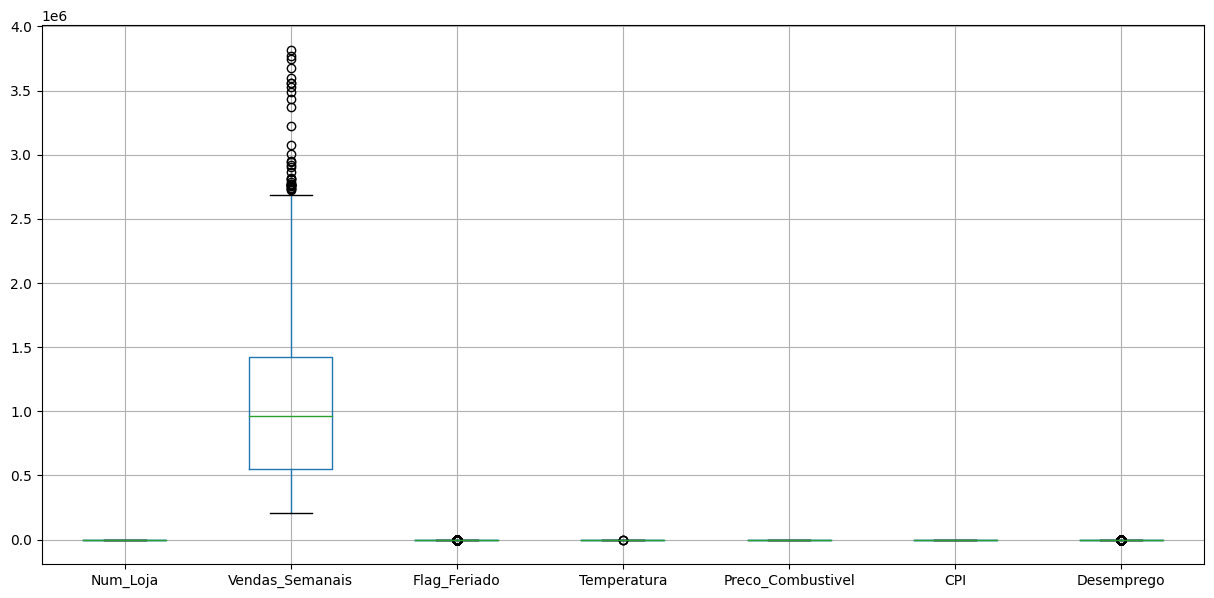

In [35]:
# encontra as classes do conjunto
from collections import Counter

df_walmart.boxplot(figsize=(15,7))

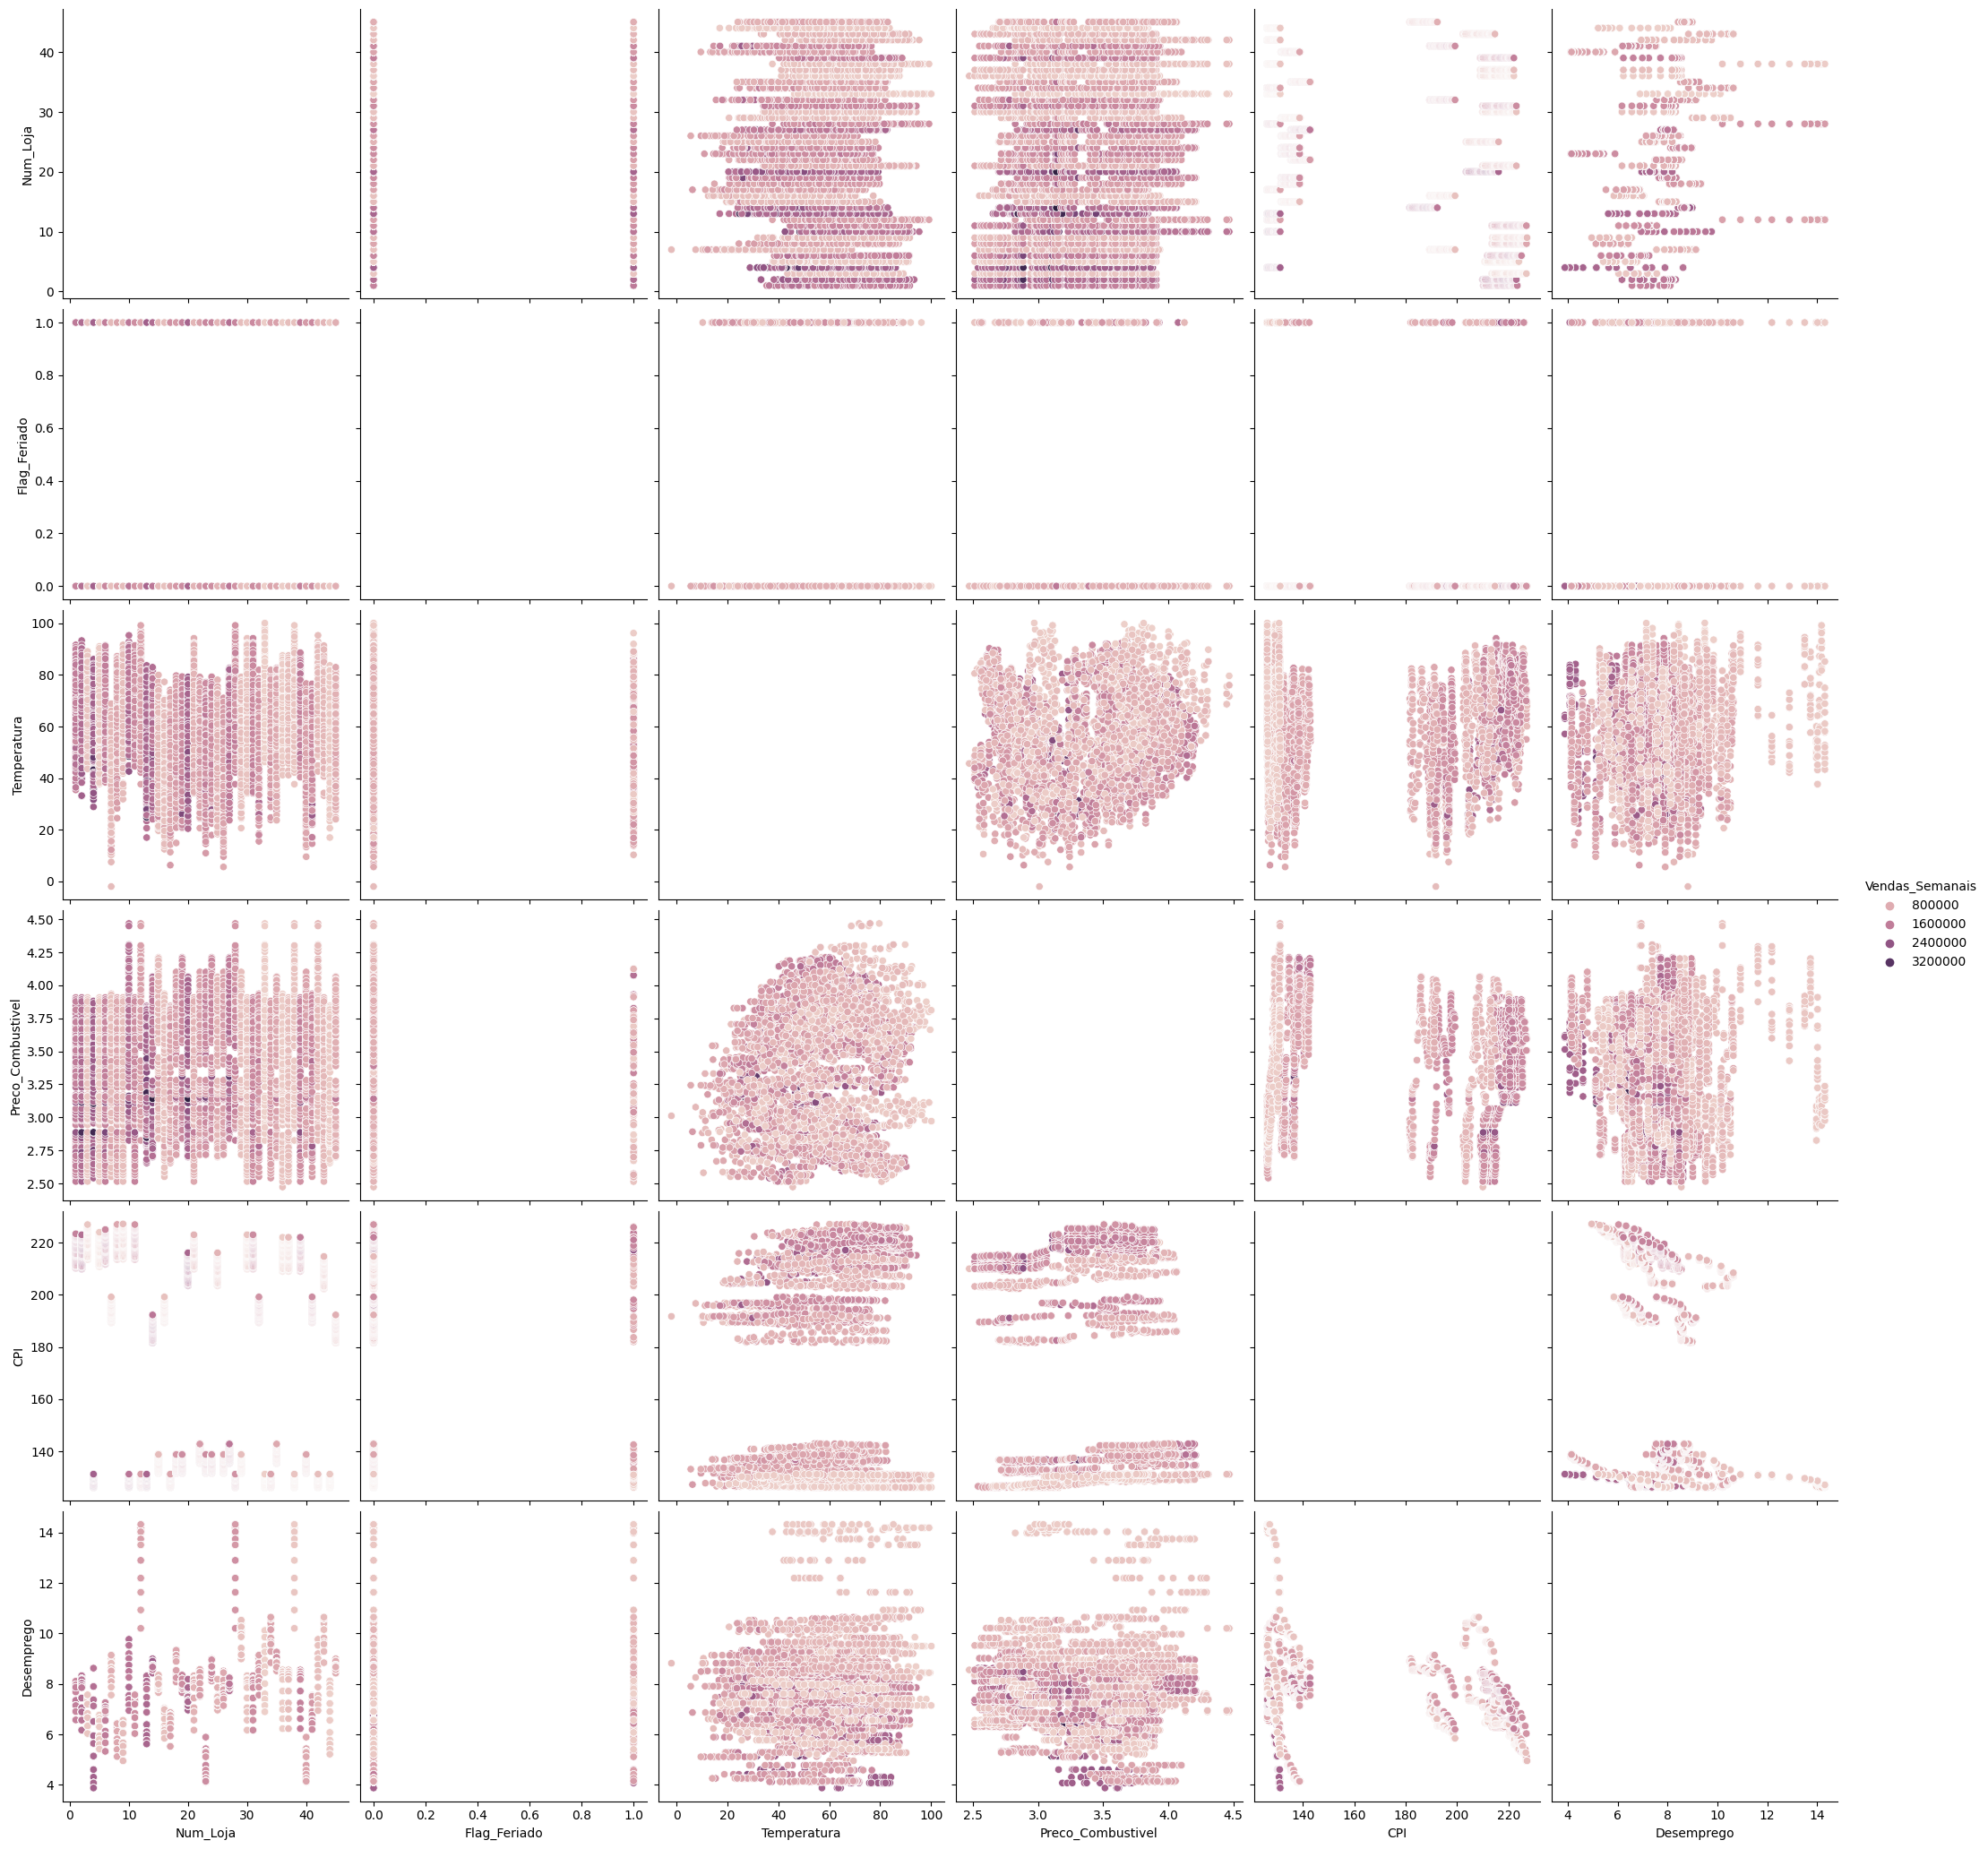

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de gráficos scatter
sns.pairplot(df_walmart, hue='Vendas_Semanais', height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [40]:
#scatter plot
sns.lmplot(x='Desemprego', y='Vendas_Semanais', data=df_walmart,
           fit_reg=False,
           hue='Vendas_Semanais')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sépala.')

# mostra o gráfico
plt.show()

KeyboardInterrupt: 

ValueError: Image size of 498x134822 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x500 with 1 Axes>

In [32]:
df_walmart.isna().sum() / df_walmart.shape[0]

Num_Loja             0.0
Data                 0.0
Vendas_Semanais      0.0
Flag_Feriado         0.0
Temperatura          0.0
Preco_Combustivel    0.0
CPI                  0.0
Desemprego           0.0
dtype: float64